In [ ]:
# pip install MOBSTERm==0.1.3

In [1]:
import MOBSTERm
import pandas as pd
import torch
import numpy as np

/Users/elenarivaroli/miniconda3/envs/mobster_test/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data = pd.read_csv("../data/test_data.csv")
data

,mutation_id,chr,from,ref,alt,causes,classes,to,Sample.A.NV,Sample.B.NV,Sample.A.DP,Sample.B.DP,Sample.A.VAF,Sample.B.VAF,chr_pos
0,14_16008308_16008308_T_G,14,16008308,T,G,SBS5,passenger,16008308,5,0,77,87,0.064935,0.000000,16008308
1,14_16021016_16021016_C_A,14,16021016,C,A,SBS5,passenger,16021016,23,0,83,79,0.277108,0.000000,16021016
2,14_16038028_16038028_C_G,14,16038028,C,G,SBS5,passenger,16038028,0,33,79,75,0.000000,0.440000,16038028
3,14_16053575_16053575_G_A,14,16053575,G,A,SBS5,passenger,16053575,0,34,87,75,0.000000,0.453333,16053575
4,14_16072811_16072811_G_A,14,16072811,G,A,SBS1,passenger,16072811,12,0,95,63,0.126316,0.000000,16072811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16587,19_58551962_58551962_G_A,19,58551962,G,A,SBS1,pre-neoplastic,58551962,27,49,62,81,0.435484,0.604938,58551962
16588,19_58557357_58557357_C_T,19,58557357,C,T,SBS5,passenger,58557357,6,0,80,77,0.075000,0.000000,58557357
16589,19_58559817_58559817_A_G,19,58559817,A,G,SBS5,passenger,58559817,0,14,83,69,0.000000,0.202899,58559817
16590,19_58581905_58581905_C_T,19,58581905,C,T,SBS1,passenger,58581905,0,50,74,91,0.000000,0.549451,58581905


In [8]:
sets = ['Sample.A', 'Sample.B']

NV_list = []
DP_list = []

for s in sets:
    print(s)
    NV = torch.tensor(data[f'{s}.NV'].to_numpy())
    DP = torch.tensor(data[f'{s}.DP'].to_numpy())
    
    NV_list.append(NV.view(-1, 1))
    DP_list.append(DP.view(-1, 1))

NV = torch.cat(NV_list, dim=1)
DP = torch.cat(DP_list, dim=1)
purity = [1,1]
print(NV.shape, DP.shape)
K_list = [5,6,7,8]

mut_id = data['mutation_id'].tolist()

Sample.A
Sample.B
torch.Size([16592, 2]) torch.Size([16592, 2])


In [12]:
seed_list = [40,41]
mb = MOBSTERm.fit(NV = NV, DP = DP, mut_id=mut_id, num_iter=1000, K=K_list, seed_list=seed_list, lr=0.01, purity = purity)

RUN WITH K = 5 AND SEED = 40
Iteration 0: Loss = 1660587648.0
Iteration 50: Loss = 1364723328.0
Iteration 100: Loss = 1325964288.0
Iteration 150: Loss = 1313923584.0
Iteration 200: Loss = 1310465024.0
Iteration 250: Loss = 1309066752.0
Iteration 300: Loss = 1308250496.0
Iteration 350: Loss = 1307862400.0
Iteration 400: Loss = 1307547264.0
ICL: 818754.75 

RUN WITH K = 5 AND SEED = 41
Iteration 0: Loss = 1656416128.0
Iteration 50: Loss = 1367404672.0
Iteration 100: Loss = 1329173504.0
Iteration 150: Loss = 1315085952.0
Iteration 200: Loss = 1310711808.0
Iteration 250: Loss = 1309104512.0
Iteration 300: Loss = 1308405248.0
Iteration 350: Loss = 1307935872.0
Iteration 400: Loss = 1307650816.0
ICL: 818853.875 

RUN WITH K = 6 AND SEED = 40
Iteration 0: Loss = 1472295168.0
Iteration 50: Loss = 1351877504.0
Iteration 100: Loss = 1327198080.0
Iteration 150: Loss = 1317148032.0
Iteration 200: Loss = 1312212352.0
Iteration 250: Loss = 1310148992.0
Iteration 300: Loss = 1308872832.0
Iteration 35

In [13]:
print(f"Number of components (K) found: {mb['best_fit']['used_components']}")

Number of components (K) found: 7


/Users/elenarivaroli/miniconda3/envs/mobster_test/lib/python3.11/site-packages/MOBSTERm/plot_functions.py:557: UserWarning: The palette list has more values (27) than needed (7), which may not be intended.
  ax = sns.scatterplot(data=df, x=x_col, y=y_col, hue='Cluster', palette=palette, s=20, alpha = 0.7, edgecolor='none') # 'tab20'


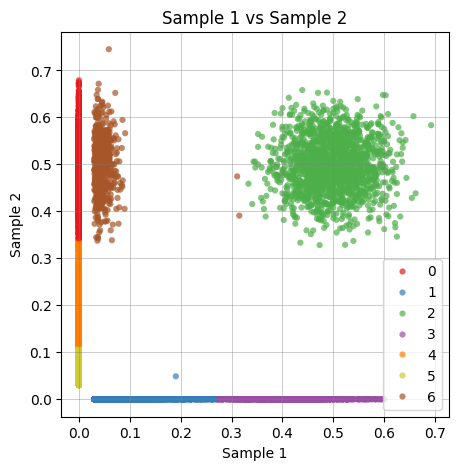

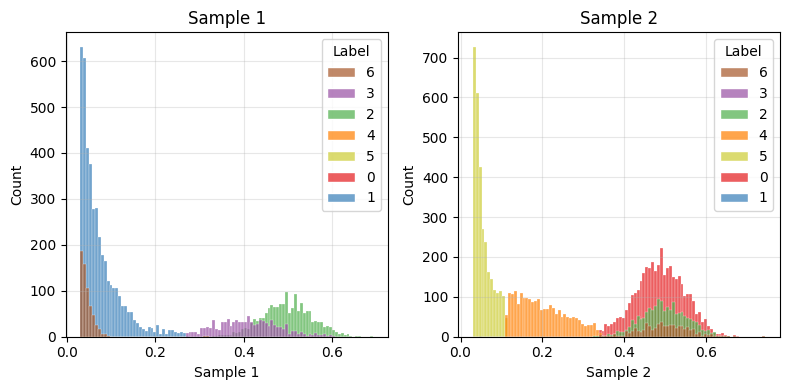

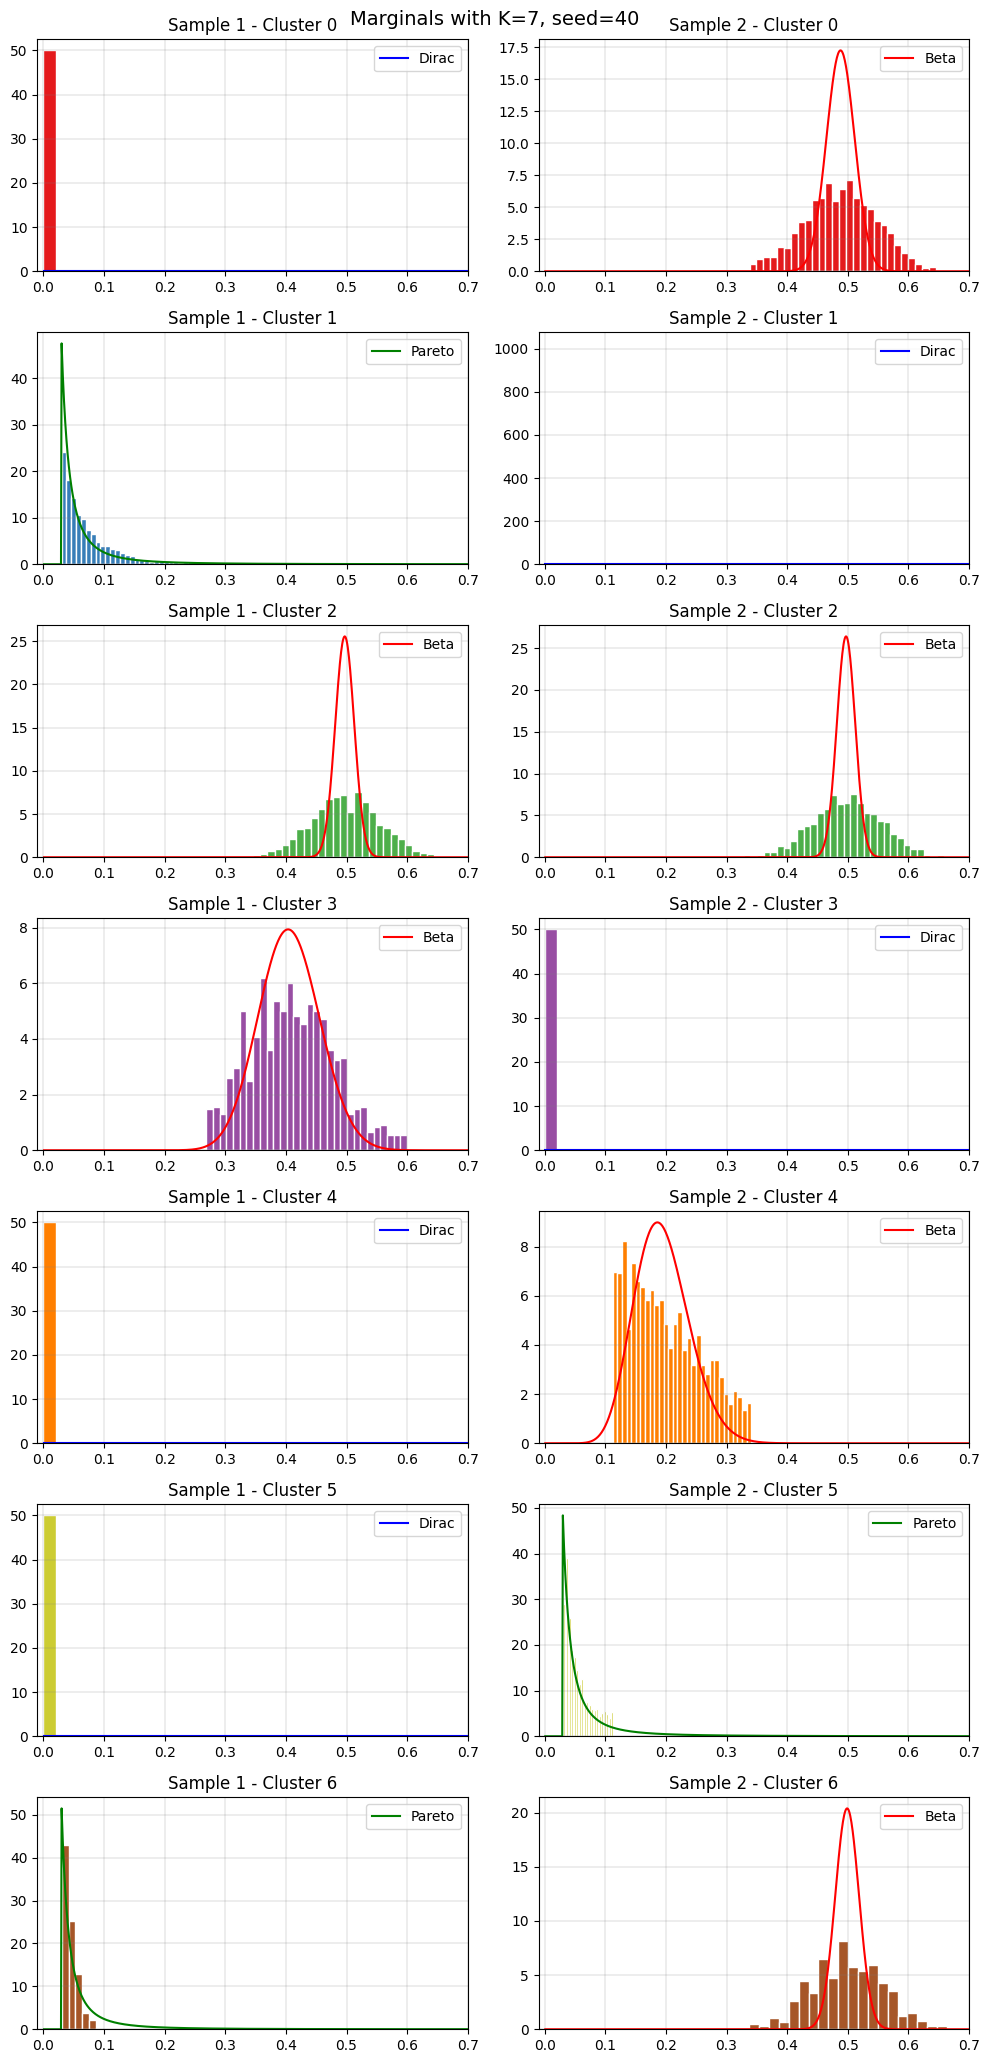

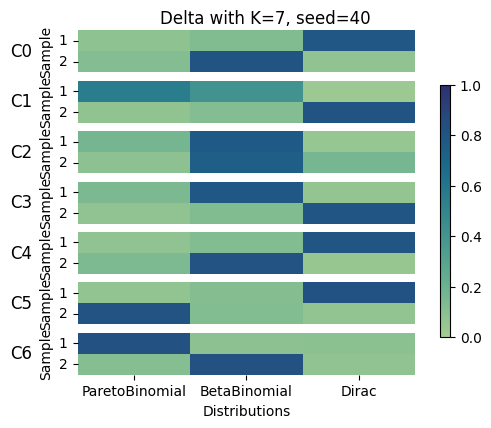

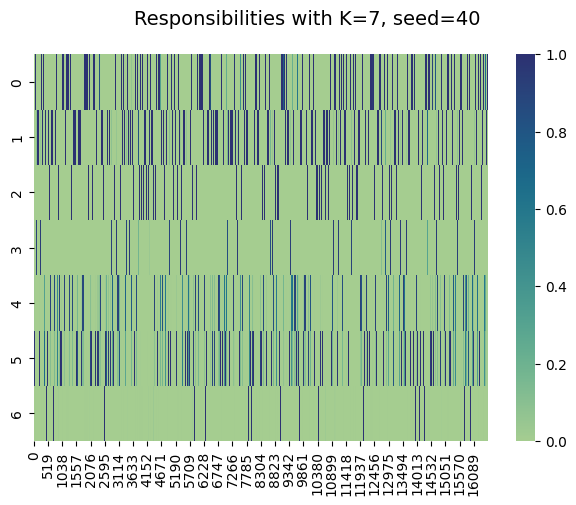

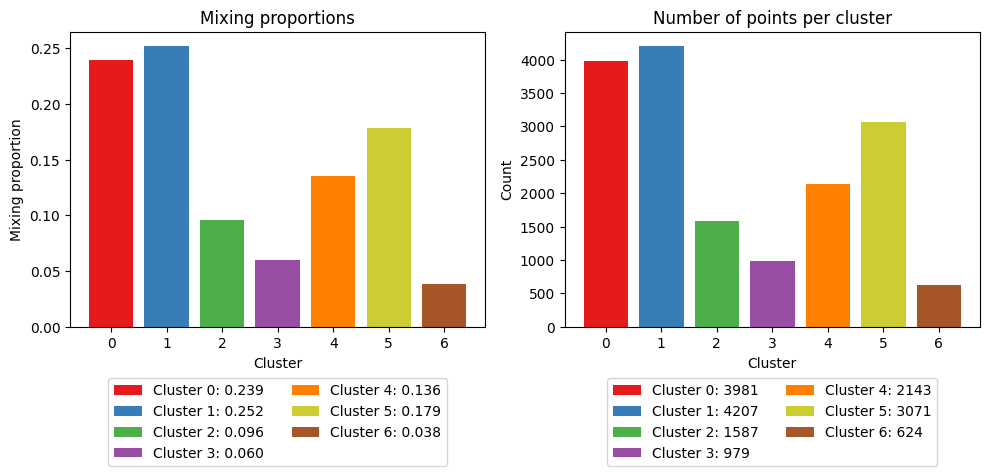

In [14]:
MOBSTERm.plot_scatter_inference(mb['best_fit'])
MOBSTERm.plot_marginals_inference(mb['best_fit'])
MOBSTERm.plot_marginals_single(mb['best_fit'])
MOBSTERm.plot_deltas(mb['best_fit'])
MOBSTERm.plot_responsib(mb['best_fit'])
MOBSTERm.plot_mixing_proportions(mb['best_fit'])

### Test 1D

In [4]:
sets = ['Sample.A', 'Sample.B']

NV_list = []
DP_list = []

for s in sets:
    print(s)
    NV = torch.tensor(data[f'{s}.NV'].to_numpy())
    DP = torch.tensor(data[f'{s}.DP'].to_numpy())
    
    NV_list.append(NV.view(-1, 1))
    DP_list.append(DP.view(-1, 1))

NV = torch.cat(NV_list, dim=1)
DP = torch.cat(DP_list, dim=1)
purity = [1]
mut_id = data['mutation_id'].tolist()
print(NV.shape, DP.shape)

Sample.A
Sample.B
torch.Size([16592, 2]) torch.Size([16592, 2])


In [5]:
NV = NV[:,0]
DP = DP[:,0]
idx = np.where(NV!=0)[0]
NV = NV[idx]
DP = DP[idx]

In [6]:
seed_list = [40,41]
K_list = [2,3,4,5]
mb = MOBSTERm.fit(NV, DP, num_iter=1500, mut_id=mut_id, K=K_list, seed_list=seed_list, lr=0.01, purity = purity)

RUN WITH K = 2 AND SEED = 40
Iteration 0: Loss = 199599728.0
Iteration 50: Loss = 185902704.0
Iteration 100: Loss = 182298752.0
Iteration 150: Loss = 181200928.0
Iteration 200: Loss = 180822864.0
Iteration 250: Loss = 180752832.0
Iteration 300: Loss = 180732368.0
Iteration 350: Loss = 180717808.0
ICL: 50351.20703125 

RUN WITH K = 2 AND SEED = 41
Iteration 0: Loss = 199255536.0
Iteration 50: Loss = 185945568.0
Iteration 100: Loss = 182584160.0
Iteration 150: Loss = 181657184.0
Iteration 200: Loss = 181356752.0
Iteration 250: Loss = 181236912.0
Iteration 300: Loss = 181154000.0
Iteration 350: Loss = 181000112.0
ICL: 50364.34375 

RUN WITH K = 3 AND SEED = 40
Iteration 0: Loss = 200348896.0
Iteration 50: Loss = 185168784.0
Iteration 100: Loss = 182154608.0
Iteration 150: Loss = 181274784.0
Iteration 200: Loss = 180937648.0
Iteration 250: Loss = 180756352.0
Iteration 300: Loss = 180652992.0
Iteration 350: Loss = 180609632.0
ICL: 51900.3125 

RUN WITH K = 3 AND SEED = 41
Iteration 0: Loss 

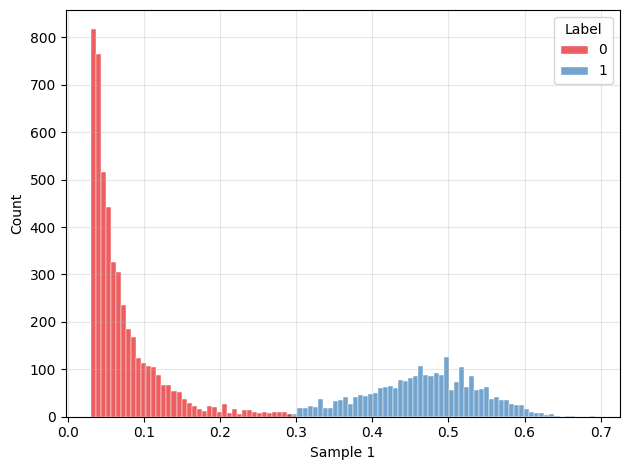

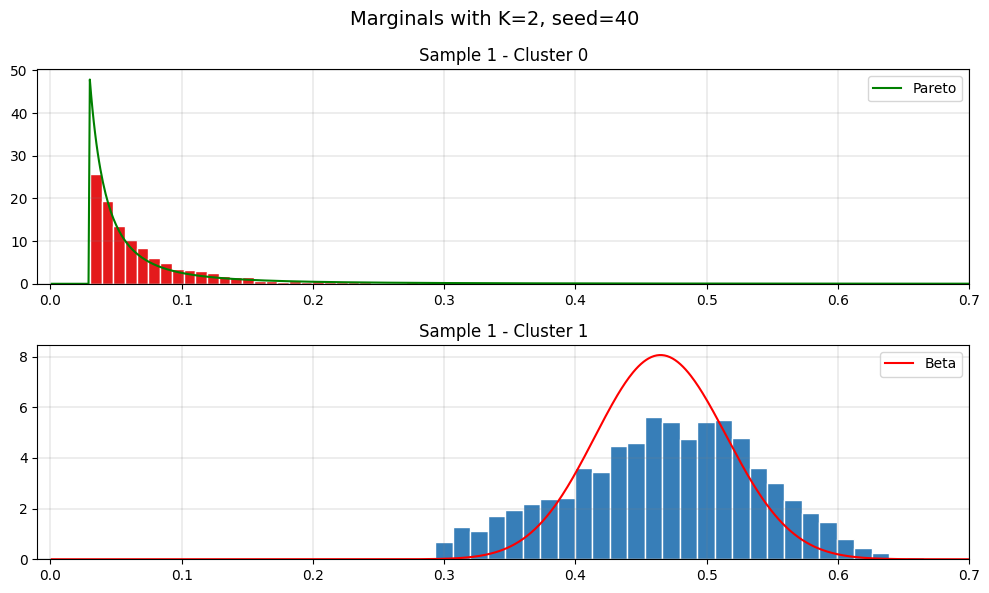

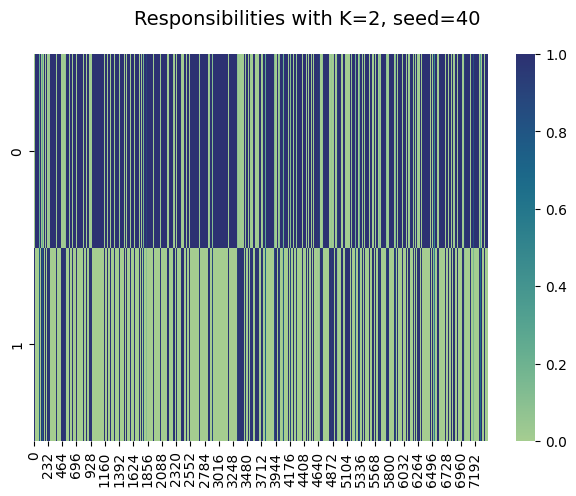

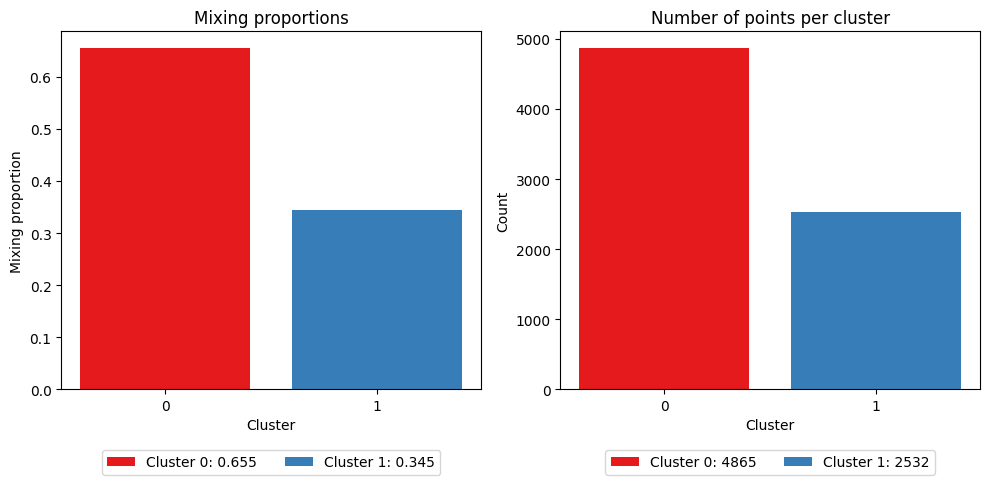

In [7]:
MOBSTERm.plot_marginals_inference(mb['best_fit'])
MOBSTERm.plot_marginals_single(mb['best_fit'])
MOBSTERm.plot_responsib(mb['best_fit'])
MOBSTERm.plot_mixing_proportions(mb['best_fit'])